In [26]:
import pandas as pd
from scipy.sparse import csc_matrix as csc
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import pyamg
from sklearn.cluster import DBSCAN

In [27]:
df=pd.read_csv('../csv/edges.csv')
df_long=df[['source','target','weight']]
row=df.source.values
col=df.target.values
data=df.weight.values
n=np.max([row,col])
n

2100

In [19]:
mat=csc((data, (row, col)), shape=(n+1, n+1)).toarray()

In [41]:
s=SpectralClustering(20)
s.fit(mat)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=20, n_init=10, n_neighbors=10, random_state=None)

In [150]:
import networkx as nx
import matplotlib.pyplot as plt
edges=pd.read_csv('..\csv\edges.csv')
df[['source','target','weight']].to_csv('..\csv\edges_networkx.csv',index=False,header=False)

In [107]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
G_fb = nx.read_weighted_edgelist("..\csv\soure_target.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)


In [108]:
print nx.info(G_fb)


Name: 
Type: Graph
Number of nodes: 2101
Number of edges: 24339
Average degree:  23.1690


In [109]:
spring_pos = nx.spring_layout(G_fb)


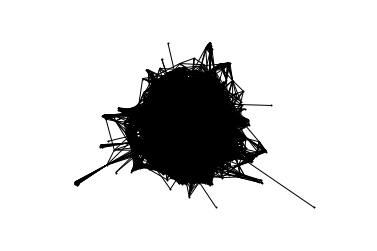

In [110]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 1)


In [141]:
parts = community.best_partition(G_fb)


In [142]:
values = [parts.get(node) for node in G_fb.nodes()]


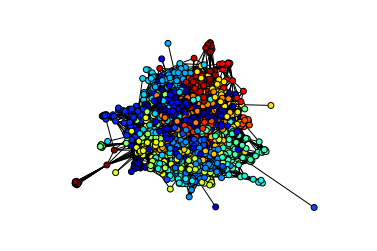

In [145]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)


In [147]:
cluters_df=pd.DataFrame(zip(range(len(values)),values),columns=['node','cluster'])
cluters_df.to_csv('..\csv\clustes.csv')

In [148]:
df

,Unnamed: 0,source,target,old_weight,type,source_target,weight
0,0,0,1,0.715507,undirected,0_1,0.828776
1,1,0,28,0.289958,undirected,0_28,0.289958
2,2,0,29,0.622196,undirected,0_29,0.622196
3,3,0,90,0.177007,undirected,0_90,0.177007
4,4,0,184,0.088668,undirected,0_184,0.088668
5,5,0,239,0.505834,undirected,0_239,0.532453
6,6,0,371,0.542074,undirected,0_371,0.542074
7,7,0,398,0.835812,undirected,0_398,0.835812
8,8,0,399,0.247843,undirected,0_399,0.247843
9,9,0,400,0.526995,undirected,0_400,0.526995
